In [4]:
using GaussianProcesses
using DelimitedFiles

data = readdlm("CO2_data.csv",',')

year = data[:,1]; co2 = data[:,2];
#Split the data into training and testing data
xtrain = year[year.<2004]; ytrain = co2[year.<2004];
xtest = year[year.>=2004]; ytest = co2[year.>=2004];

#Kernel is represented as a sum of kernels
kernel = SE(4.0,4.0) + Periodic(0.0,1.0,0.0)*SE(4.0,0.0) + RQ(0.0,0.0,-1.0) + SE(-2.0,-2.0);

gp = GP(xtrain,ytrain,MeanZero(),kernel,-2.0)   #Fit the GP

GP Exact object:
  Dim = 1
  Number of observations = 550
  Mean function:
    Type: MeanZero, Params: Float64[]
  Kernel:
    Type: SumKernel{SumKernel{SumKernel{SEIso{Float64},ProdKernel{Periodic{Float64},SEIso{Float64}}},RQIso{Float64}},SEIso{Float64}}
      Type: SumKernel{SumKernel{SEIso{Float64},ProdKernel{Periodic{Float64},SEIso{Float64}}},RQIso{Float64}}
        Type: SumKernel{SEIso{Float64},ProdKernel{Periodic{Float64},SEIso{Float64}}}
          Type: SEIso{Float64}, Params: [4.0, 4.0]          Type: ProdKernel{Periodic{Float64},SEIso{Float64}}
            Type: Periodic{Float64}, Params: [0.0, 1.0, 0.0]            Type: SEIso{Float64}, Params: [4.0, 0.0]        Type: RQIso{Float64}, Params: [0.0, 0.0, -1.0]      Type: SEIso{Float64}, Params: [-2.0, -2.0]
  Input observations = 
[1958.2083333333333 1958.2916666666667 … 2003.875 2003.9583333333333]
  Output observations = [315.71, 317.45, 317.5, 317.1, 315.86, 314.93, 313.2, 312.66, 313.33, 314.67  …  376.48, 377.74, 378.5, 37

In [5]:
optimize!(gp) #Estimate the parameters through maximum likelihood estimation

μ, Σ = predict_y(gp,xtest);

In [31]:
import Pkg; Pkg.add("ORCA")

 Resolving package versions...
 Installed ORCA ─ v0.3.1
  Updating `~/Documents/codes/Project.toml`
  [47be7bcc] + ORCA v0.3.1
  Updating `~/Documents/codes/Manifest.toml`
  [8f4d0f93] + Conda v1.4.1
  [47be7bcc] + ORCA v0.3.1
  [81def892] + VersionParsing v1.2.0
  Building ORCA → `~/.julia/packages/ORCA/fiEmb/deps/build.log`


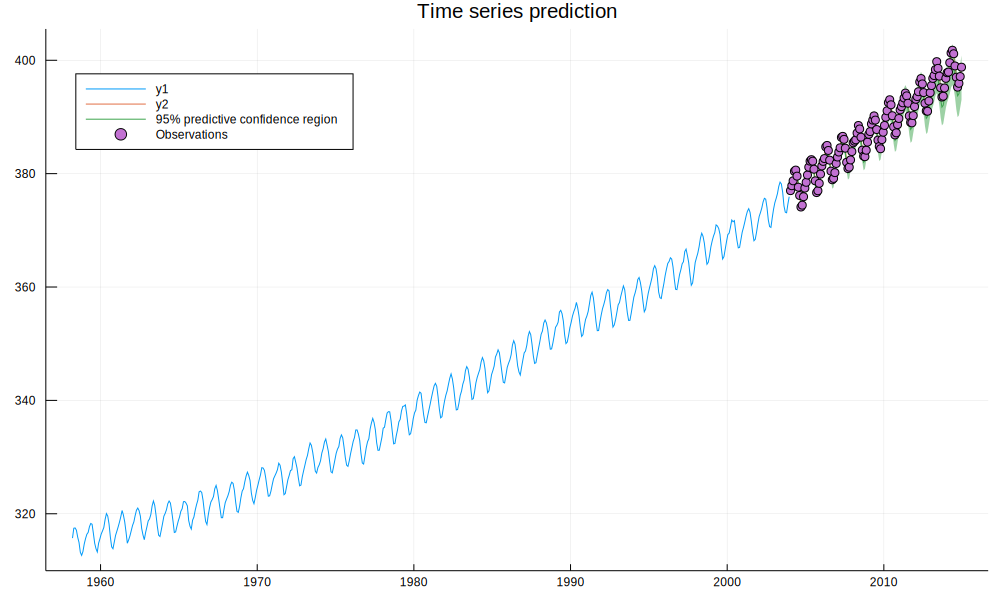

In [36]:
#using Plots
gr()
plot([xtrain, xtest], [ytrain, ytest], size=(1000,600))
plot!(xtest,μ,ribbon=Σ, title="Time series prediction",label="95% predictive confidence region", legend=:topleft)
scatter!(xtest,ytest,label="Observations")